In [1]:
%matplotlib widget  
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc_in = nn.Linear(2, 5)  # Define Fully connected input layer : 2 input features, 5 nodes in hidden layer
        self.fc_h1 = nn.Linear(5, 5)  # Define Fully connected hidden layer : 5 input features, 5 nodes in hidden layer
        self.fc_out = nn.Linear(5, 1)   # Define Fully connected hidden layer : 5 input features, 1 nodes in hidden layer

    def forward(self, x):
        y1 = self.fc_in(x)
        y1 = torch.relu(y1)

        y2 = self.fc_h1(y1)
        y2 = torch.relu(y2)

        y3 = self.fc_out(y2)
        return y3

In [3]:
# Load the model
model = Net()
model.load_state_dict(torch.load('SimpleNNmodel.pth'))

x_test = torch.randn(1,2)


# Define the linear function
def f(x, a, b):
    f = a * x[:,0] + b * x[:,1]
    return f.unsqueeze(1)
a, b = 2, 1
y_expected = f(x_test, a, b)
print("x_test : ",x_test)
print("y_expected : ",y_expected)

y_predicted = model(x_test)
print("y_predicted : ",y_predicted)

x_test :  tensor([[0.1937, 0.1948]])
y_expected :  tensor([[0.5822]])
y_predicted :  tensor([[0.6465]], grad_fn=<AddmmBackward0>)


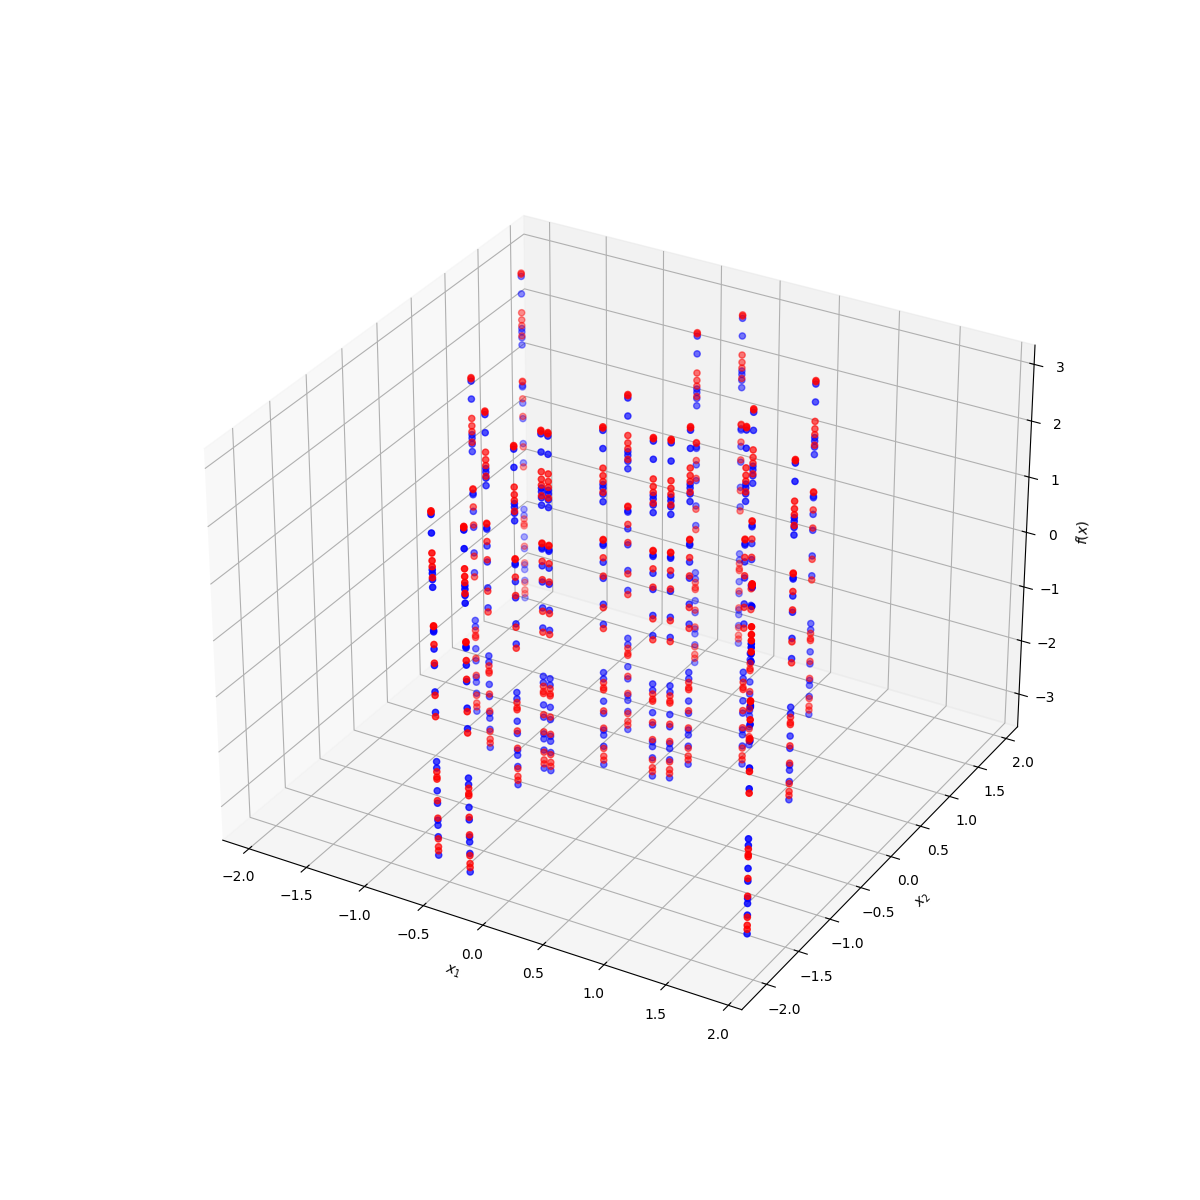

In [4]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
x_test = torch.randn(20,2)
y_predicted = model(x_test)

ax.scatter(x_test[:,0], x_test[:,1], f(x_test, a, b), c='b', marker='o')
ax.scatter(x_test[:,0], x_test[:,1], y_predicted.detach(), c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

plt.show()
plt.savefig('Test results.png')